# 2. Data exploration

## Set up
Let's import utilities from the previous notebook, and unpickle the cleaned dataset.

In [1]:
# Usual imports
import matplotlib.pyplot as plt
import seaborn as sns
# Apply the default theme
sns.set_theme(font_scale=1)

### Read the dataset form the previous step
import pandas as pd
df = pd.read_pickle("Xy_train_df_step1.pickle")
df.head()
#df["Label"].sum() / df.shape[0]

Customer_Age  Dependent_count  Education_Level  Income_Category  \
0     -1.288101        -1.806378        -0.039873        -0.837746   
1     -0.290150         0.503368        -0.807534         0.312139   
2     -0.040662        -0.266547        -0.807534         1.462024   
3     -1.288101        -0.266547         0.727789        -0.837746   
4      0.458314        -1.036462         0.727789         2.228614   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0       -1.493661                  0.120579                0.651940   
1        0.008965                  0.763943               -0.337598   
2       -0.742348                  1.407306                0.651940   
3       -1.493661                 -0.522785               -1.327136   
4        0.509840                  0.120579               -0.337598   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              -0.411616     -0.667004             1.309516        -0.784263   
1               0.492404      1.831365            -1.426858         1.958900   
2              -1.315636      0.334280            -0.304086         0.361471   
3               0.492404     -0.606047             0.527870        -0.653244   
4               0.492404      2.848054             0.027224         2.845015   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             -0.337327        -0.779840       -0.973895            -1.109831   
1              0.406300        -0.624701       -1.144315            -0.542782   
2              0.602472        -0.037412        1.028541             0.595518   
3              0.497543        -0.810161       -1.016500            -1.450061   
4             -0.159404        -0.156047        0.304255             0.007467   

   Avg_Utilization_Ratio  Card_Category  Label  
0               2.151448            0.0      0  
1              -0.997155            3.0      1  
2              -0.714216            0.0      0  
3               0.852830            0.0      0  
4              -0.873823            0.0      0

In [2]:
corr_matrix = df.corr()
sorted(zip(corr_matrix["Months_Inactive_12_mon"].index, corr_matrix["Months_Inactive_12_mon"].values),
       key=lambda x: abs(x[1]), reverse=True)[:7]

[('Months_Inactive_12_mon', 1.0),
 ('Label', 0.15793696785340214),
 ('Months_on_book', 0.06778280864202155),
 ('Total_Revolving_Bal', -0.05131968994014064),
 ('Customer_Age', 0.05051876230199617),
 ('Total_Ct_Chng_Q4_Q1', -0.04867128305295917),
 ('Total_Trans_Ct', -0.04252991362358253)]

In [3]:
# Find correlations greater than 90%
corr_matrix[corr_matrix.apply(lambda x: x>0.7, axis=0)]

Customer_Age  Dependent_count  Education_Level  \
Customer_Age                  1.000000              NaN              NaN   
Dependent_count                    NaN              1.0              NaN   
Education_Level                    NaN              NaN              1.0   
Income_Category                    NaN              NaN              NaN   
Months_on_book                0.788514              NaN              NaN   
Total_Relationship_Count           NaN              NaN              NaN   
Months_Inactive_12_mon             NaN              NaN              NaN   
Contacts_Count_12_mon              NaN              NaN              NaN   
Credit_Limit                       NaN              NaN              NaN   
Total_Revolving_Bal                NaN              NaN              NaN   
Avg_Open_To_Buy                    NaN              NaN              NaN   
Total_Amt_Chng_Q4_Q1               NaN              NaN              NaN   
Total_Trans_Amt                    NaN              NaN              NaN   
Total_Trans_Ct                     NaN              NaN              NaN   
Total_Ct_Chng_Q4_Q1                NaN              NaN              NaN   
Avg_Utilization_Ratio              NaN              NaN              NaN   
Card_Category                      NaN              NaN              NaN   
Label                              NaN              NaN              NaN   

                          Income_Category  Months_on_book  \
Customer_Age                          NaN        0.788514   
Dependent_count                       NaN             NaN   
Education_Level                       NaN             NaN   
Income_Category                       1.0             NaN   
Months_on_book                        NaN        1.000000   
Total_Relationship_Count              NaN             NaN   
Months_Inactive_12_mon                NaN             NaN   
Contacts_Count_12_mon                 NaN             NaN   
Credit_Limit                          NaN             NaN   
Total_Revolving_Bal                   NaN             NaN   
Avg_Open_To_Buy                       NaN             NaN   
Total_Amt_Chng_Q4_Q1                  NaN             NaN   
Total_Trans_Amt                       NaN             NaN   
Total_Trans_Ct                        NaN             NaN   
Total_Ct_Chng_Q4_Q1                   NaN             NaN   
Avg_Utilization_Ratio                 NaN             NaN   
Card_Category                         NaN             NaN   
Label                                 NaN             NaN   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                                   NaN                     NaN   
Dependent_count                                NaN                     NaN   
Education_Level                                NaN                     NaN   
Income_Category                                NaN                     NaN   
Months_on_book                                 NaN                     NaN   
Total_Relationship_Count                       1.0                     NaN   
Months_Inactive_12_mon                         NaN                     1.0   
Contacts_Count_12_mon                          NaN                     NaN   
Credit_Limit                                   NaN                     NaN   
Total_Revolving_Bal                            NaN                     NaN   
Avg_Open_To_Buy                                NaN                     NaN   
Total_Amt_Chng_Q4_Q1                           NaN                     NaN   
Total_Trans_Amt                                NaN                     NaN   
Total_Trans_Ct                                 NaN                     NaN   
Total_Ct_Chng_Q4_Q1                            NaN                     NaN   
Avg_Utilization_Ratio                          NaN                     NaN   
Card_Category                                  NaN                     NaN   
Label            

'Credit_Limit' is 99.6% correlated with 'Avg_Open_To_Buy'. Therefore the latter feature can be dropped.

In [4]:
df = df.drop("Avg_Open_To_Buy", axis=1)

We will plot the column distributions using the `scatter_matrix(.)` function.
The resulting array of plots shows:
- each column distribution in the diagonal subplots
- correlations between respecive pairs of columns in the non-diagonal subplots

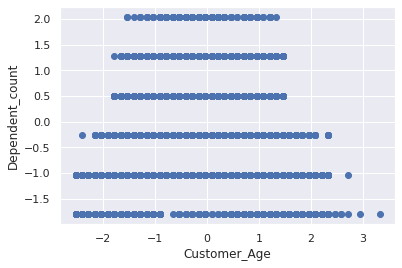

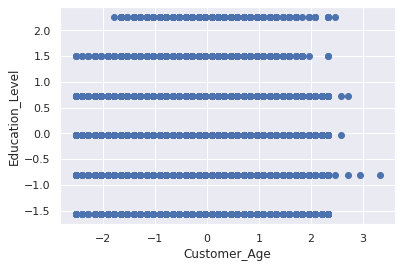

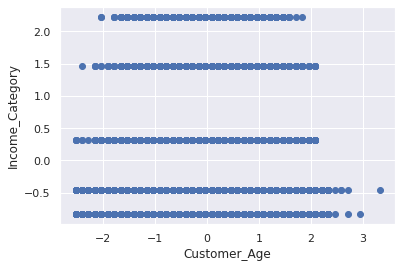

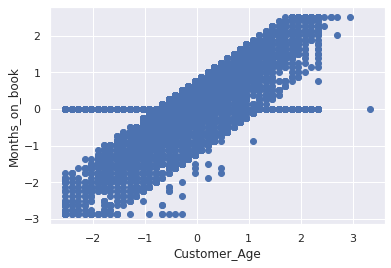

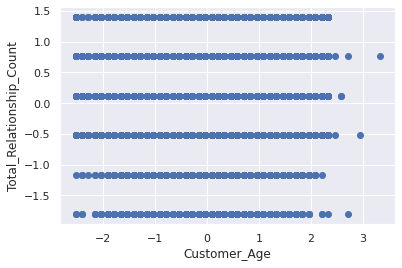

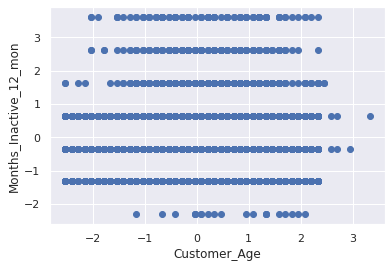

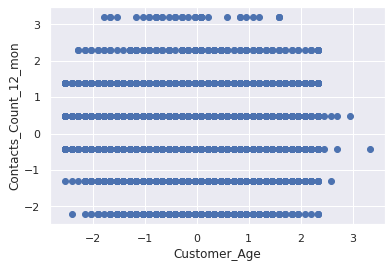

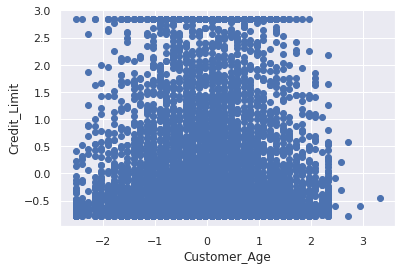

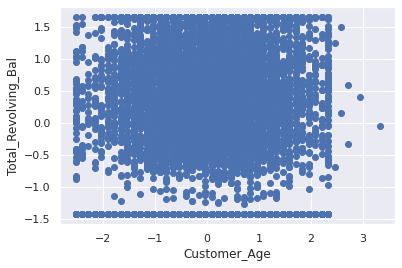

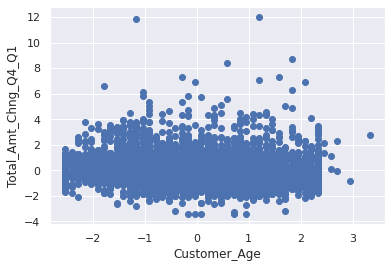

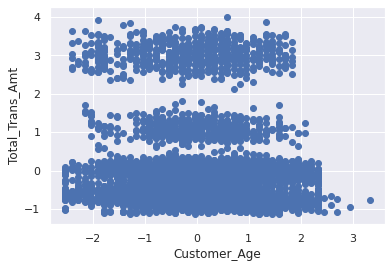

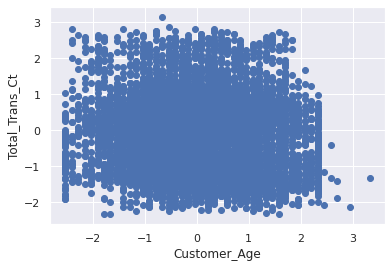

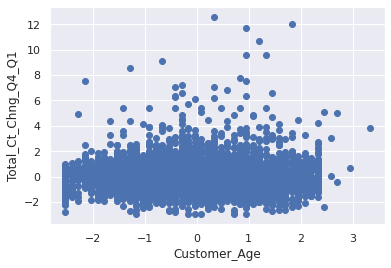

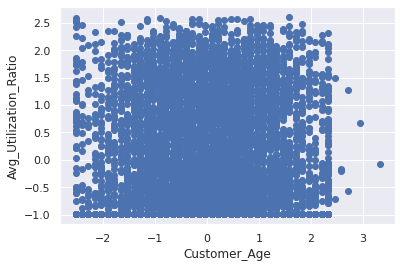

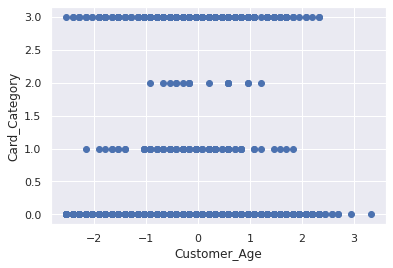

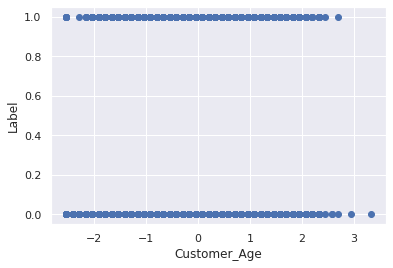

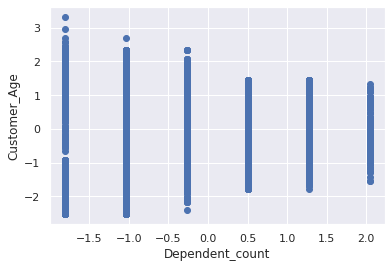

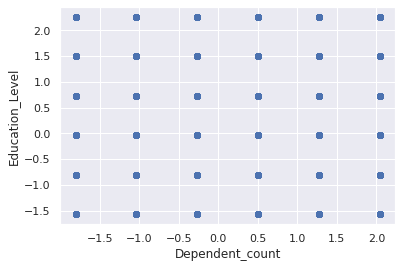

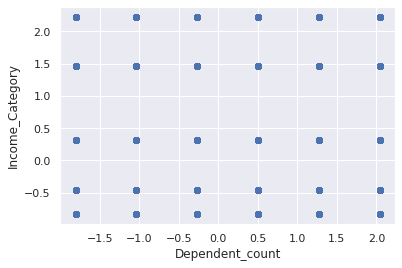

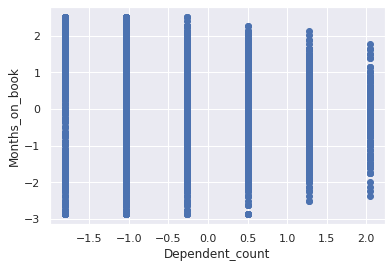

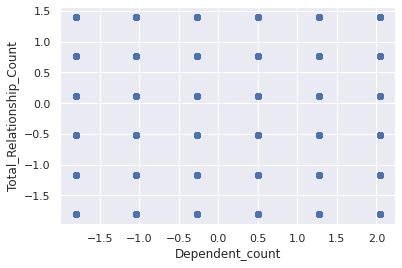

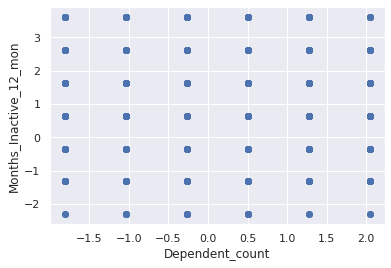

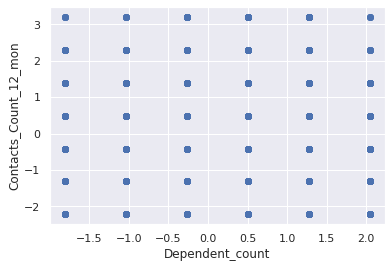

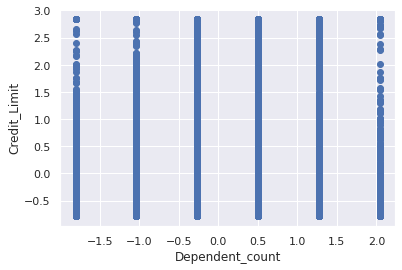

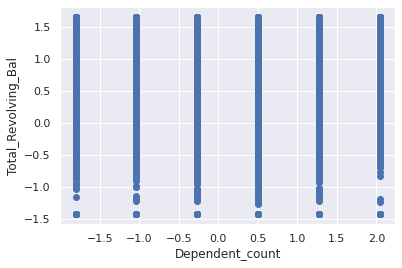

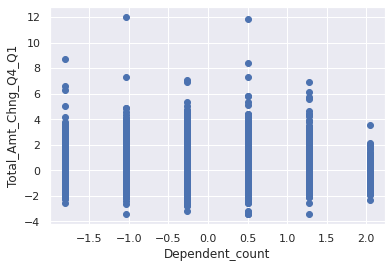

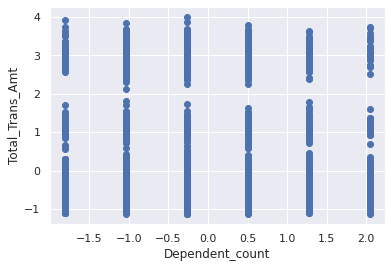

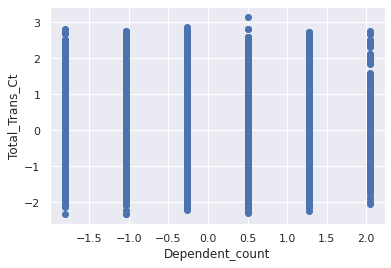

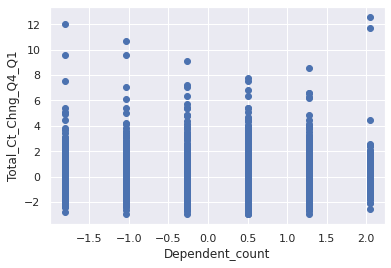

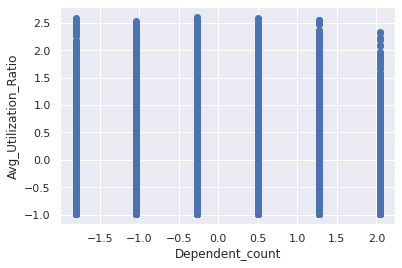

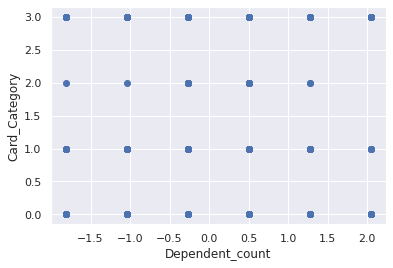

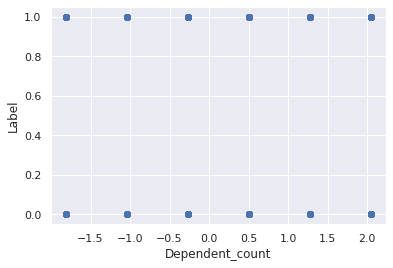

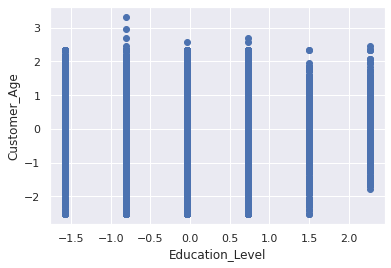

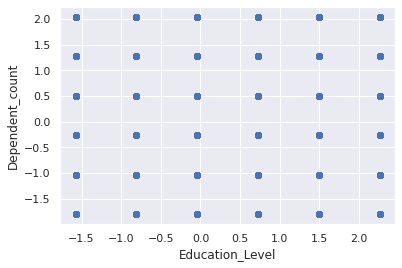

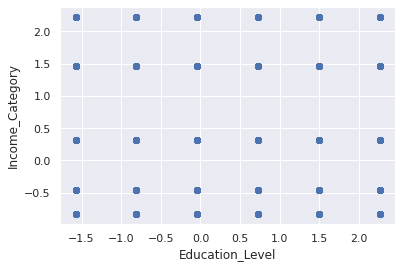

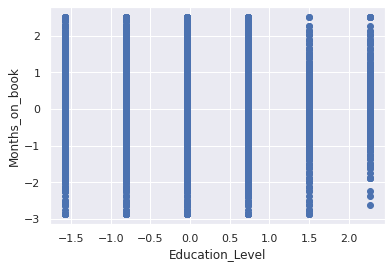

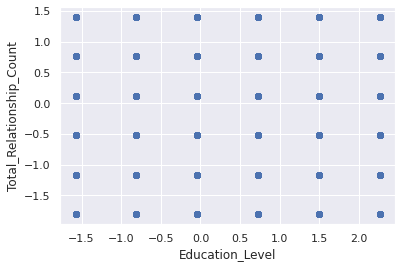

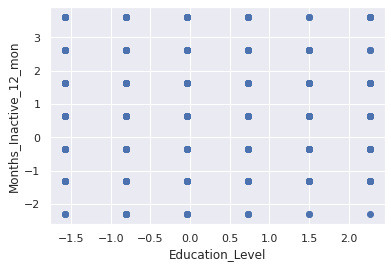

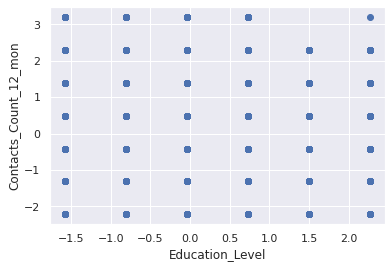

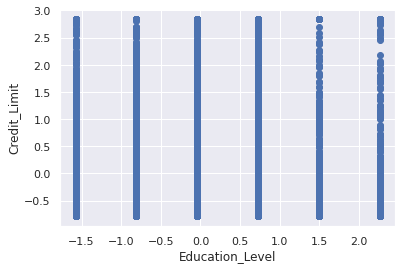

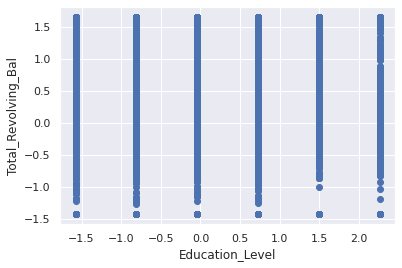

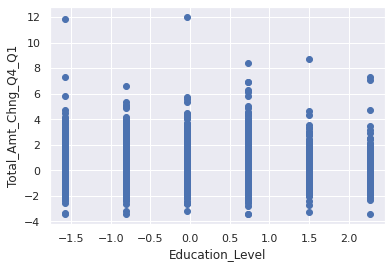

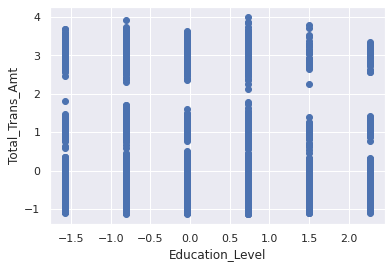

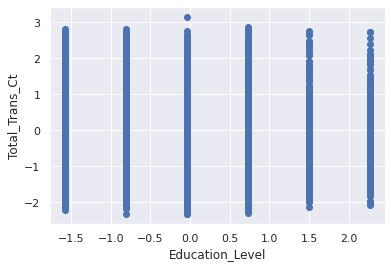

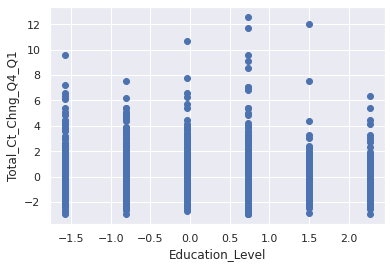

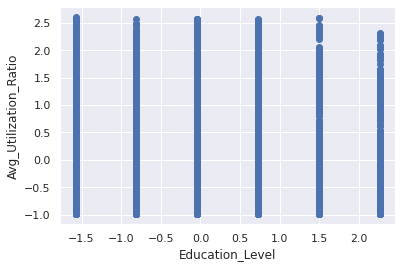

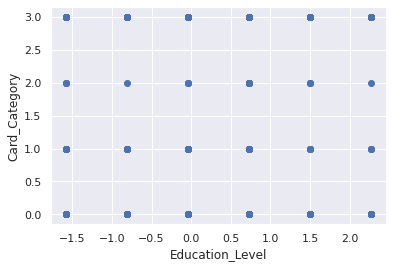

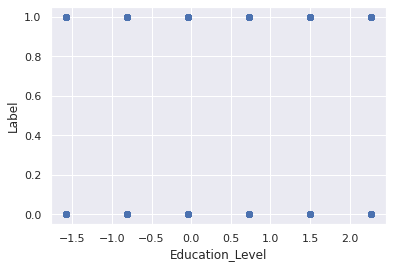

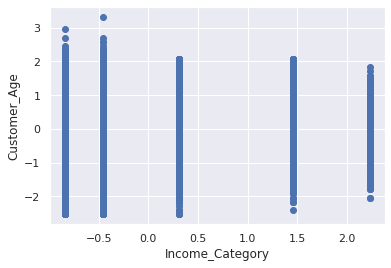

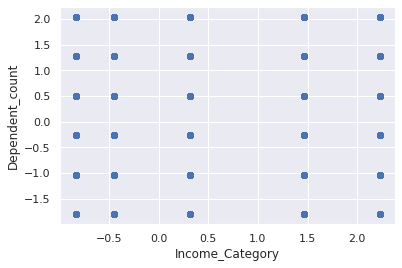

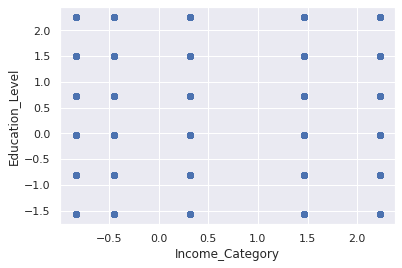

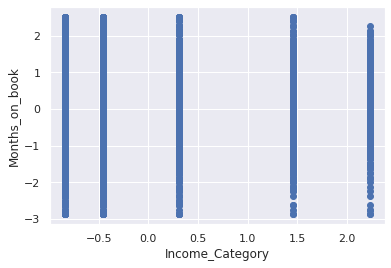

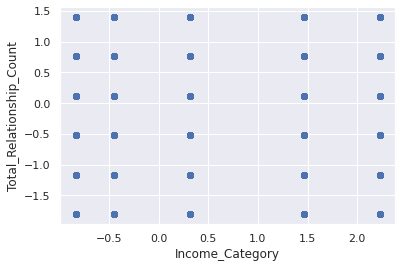

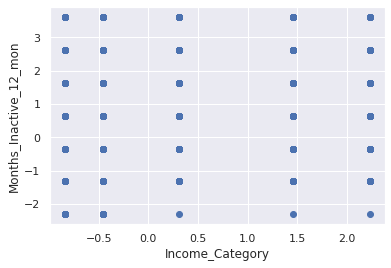

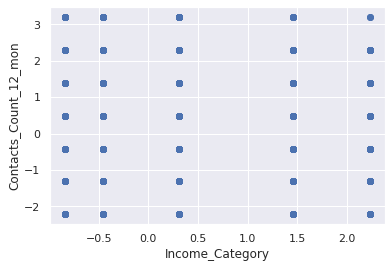

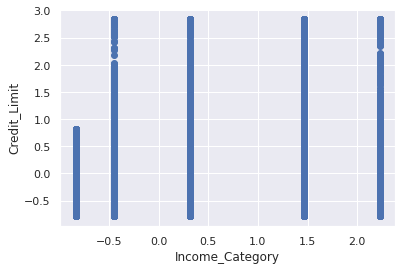

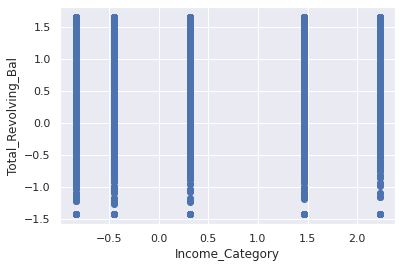

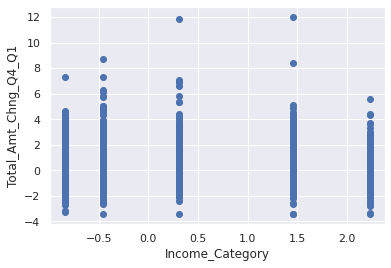

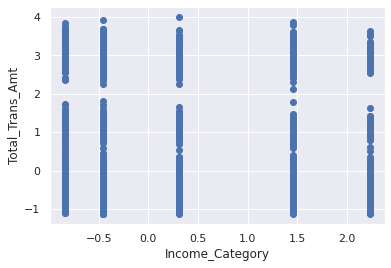

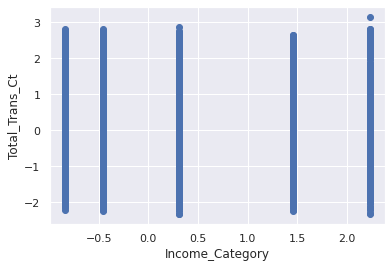

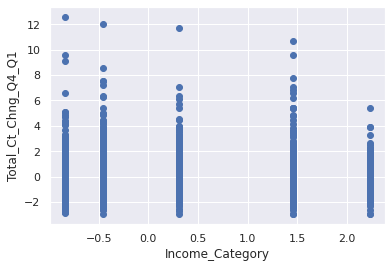

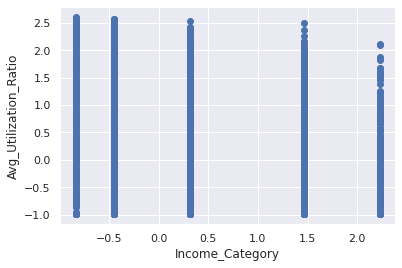

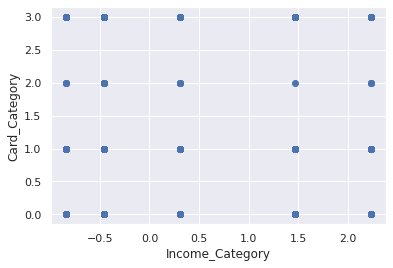

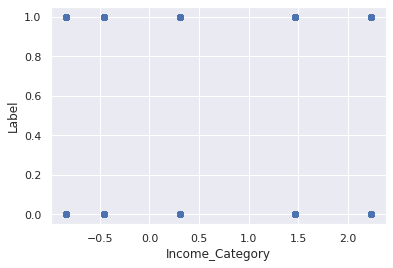

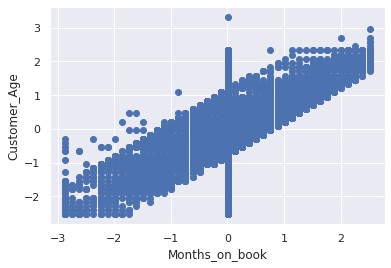

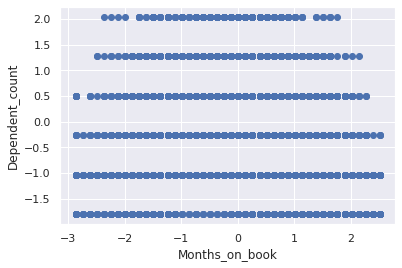

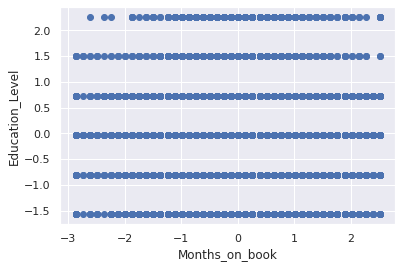

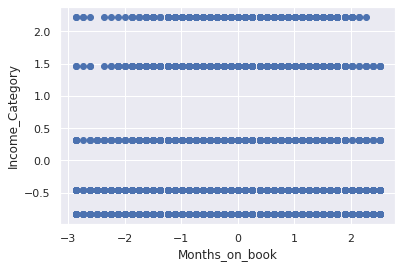

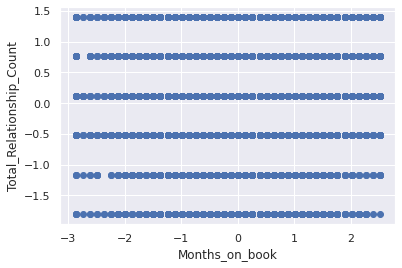

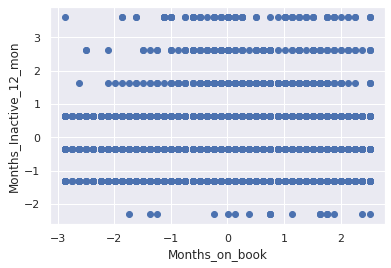

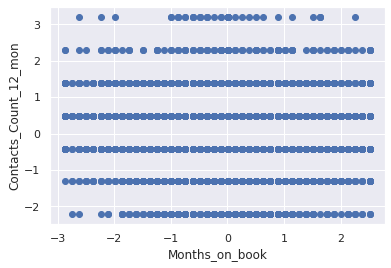

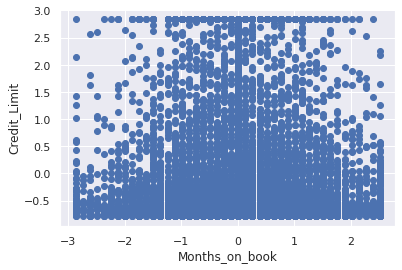

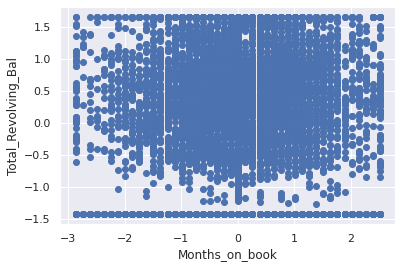

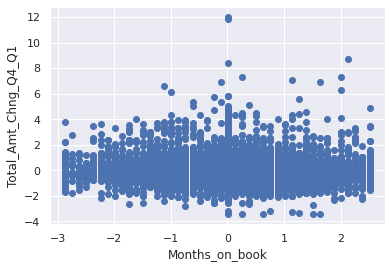

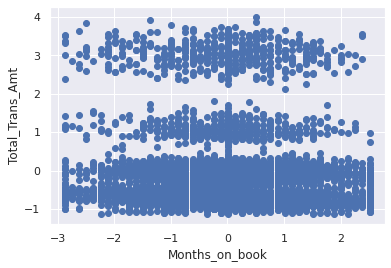

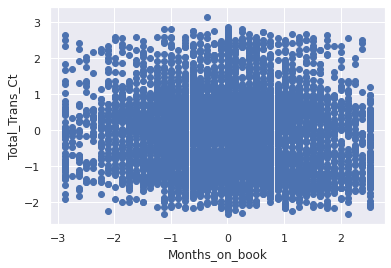

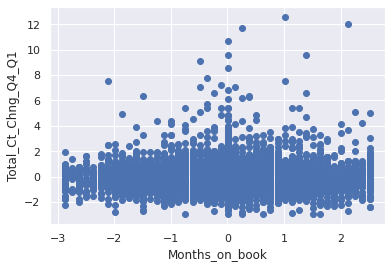

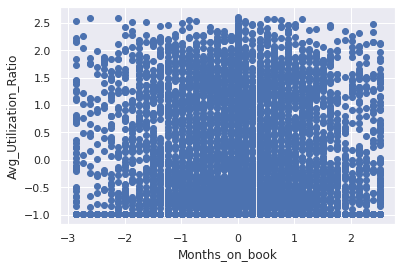

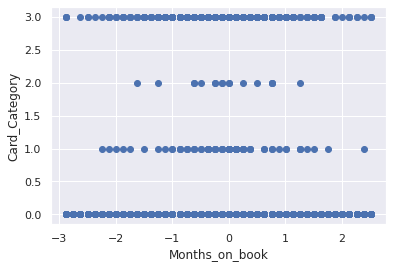

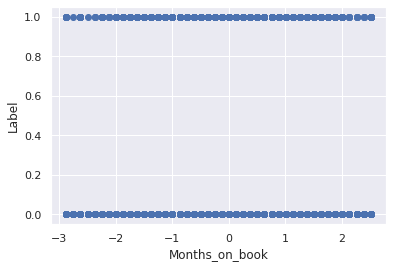

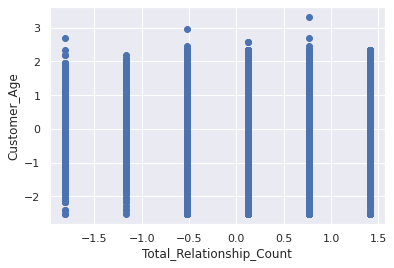

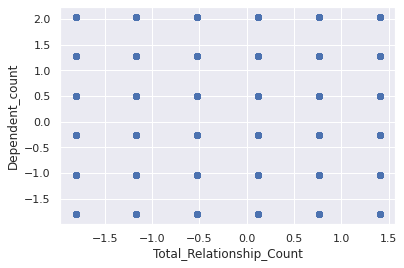

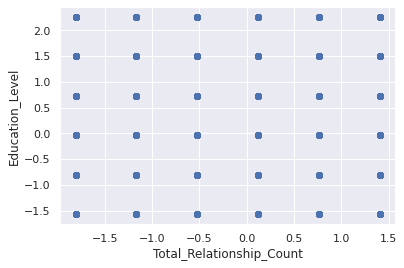

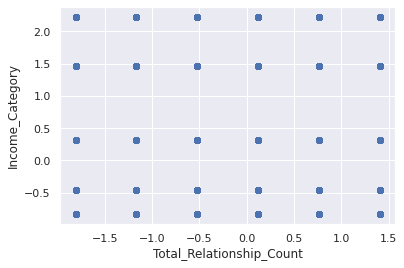

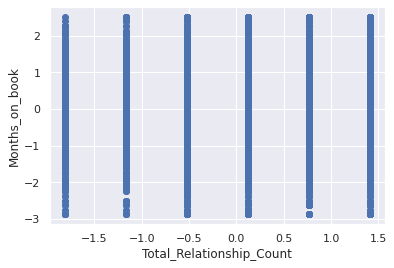

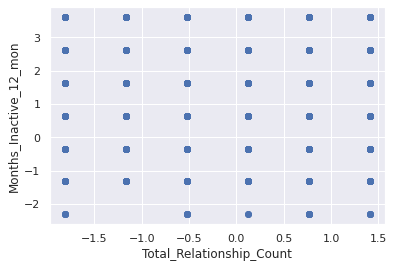

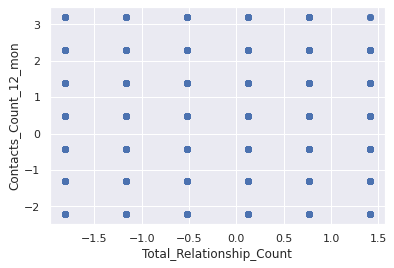

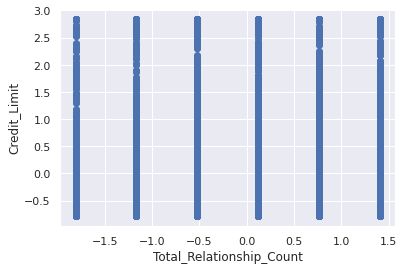

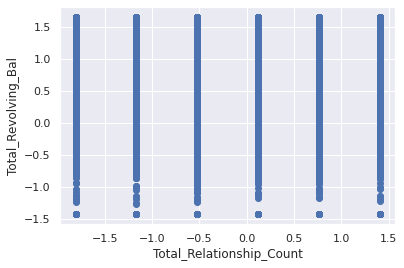

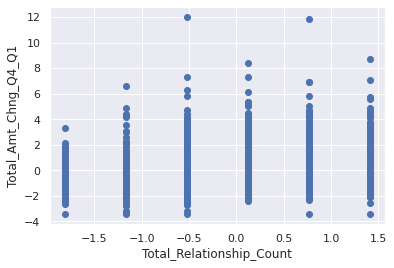

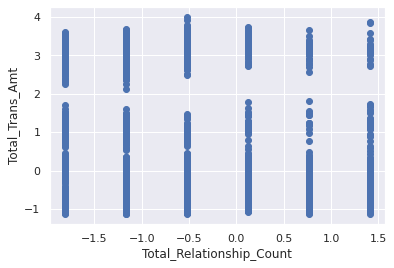

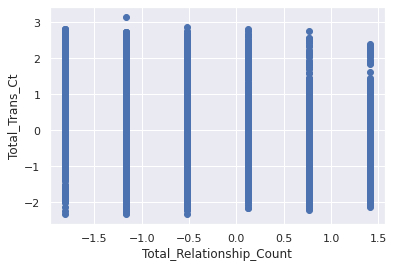

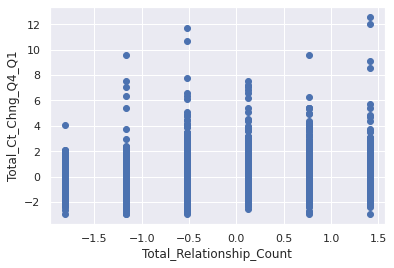

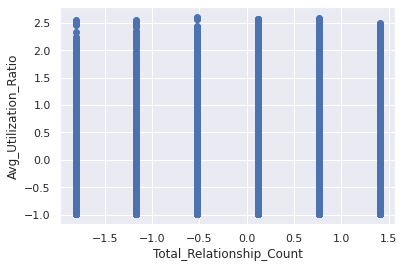

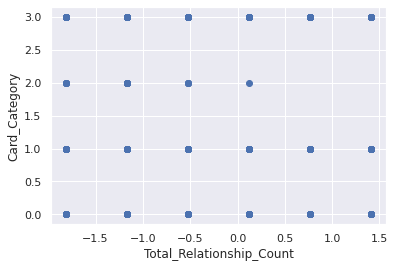

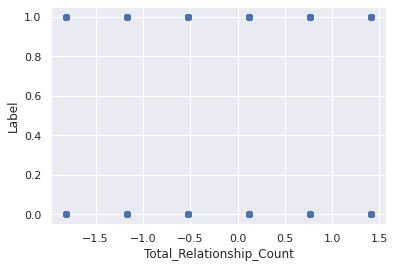

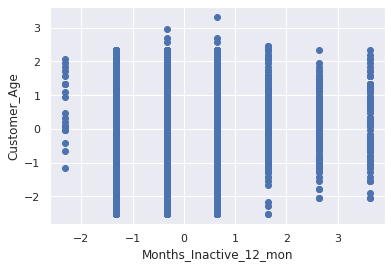

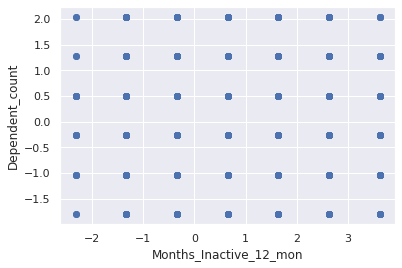

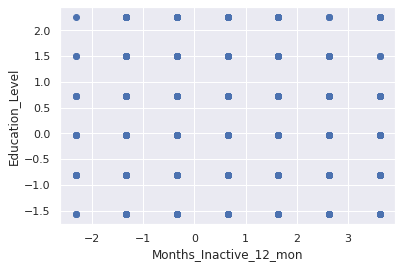

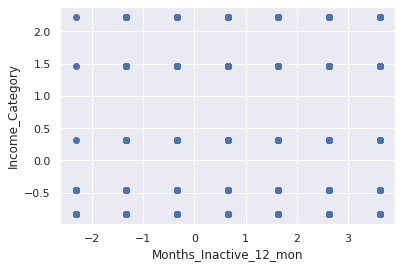

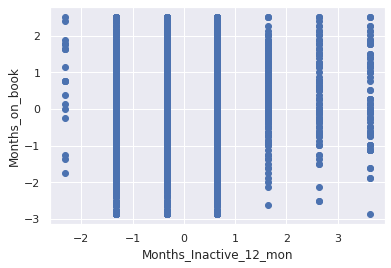

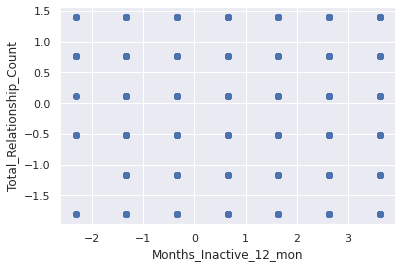

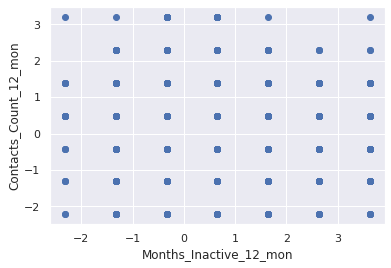

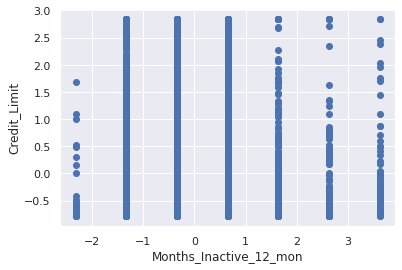

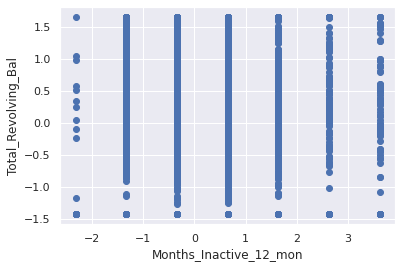

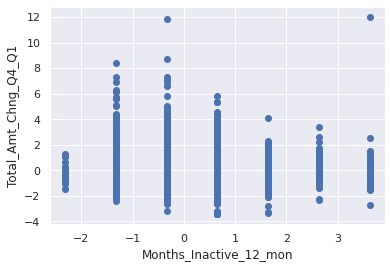

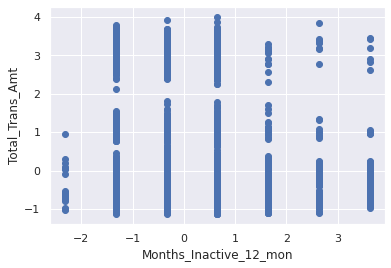

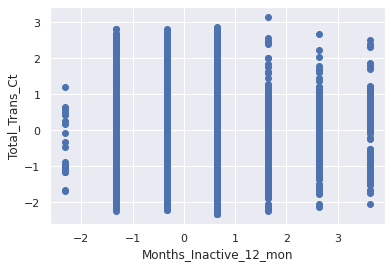

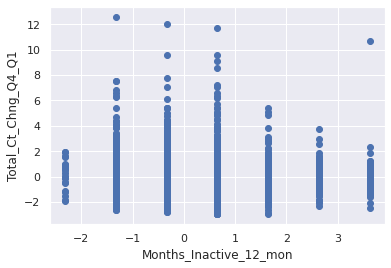

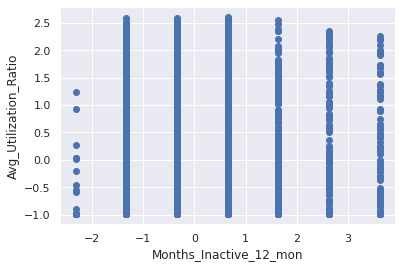

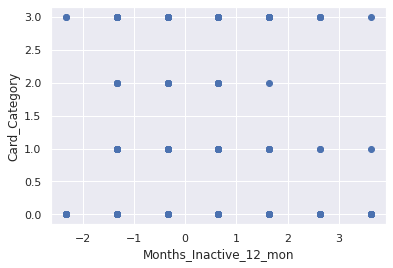

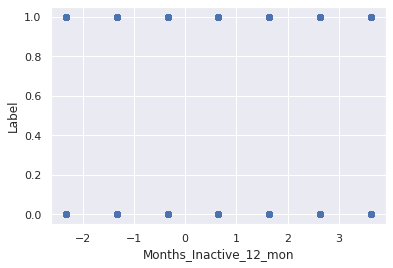

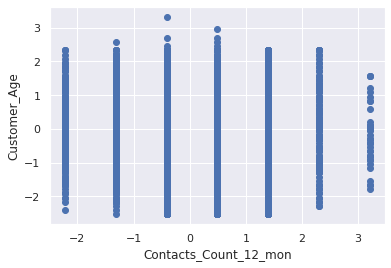

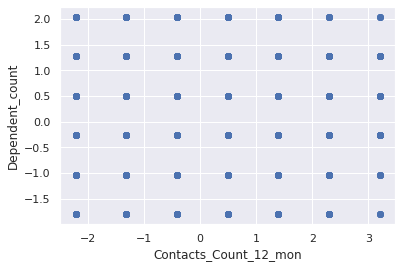

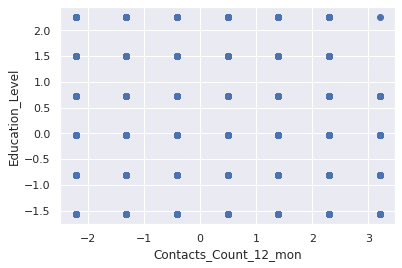

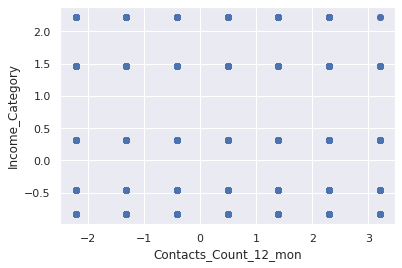

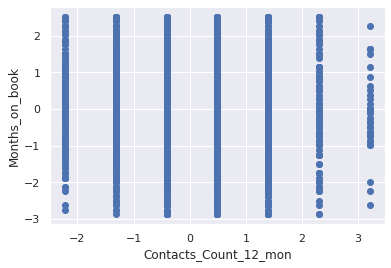

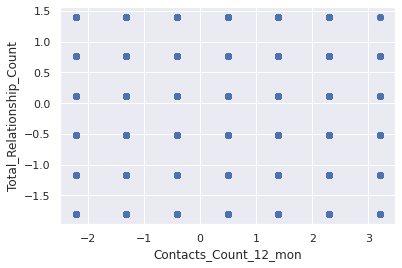

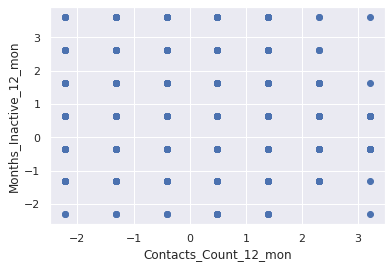

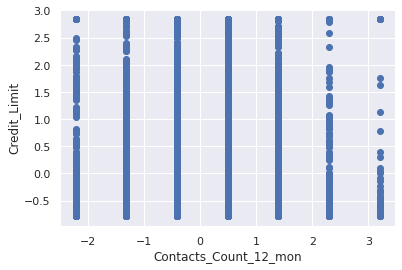

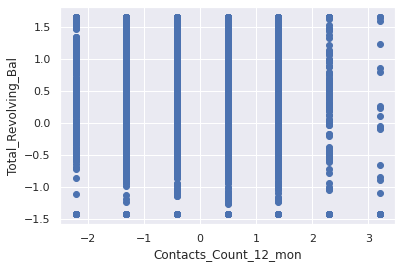

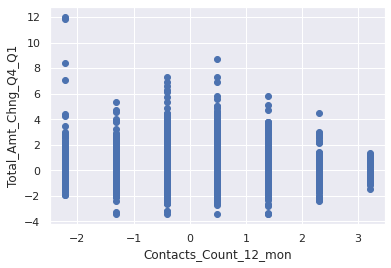

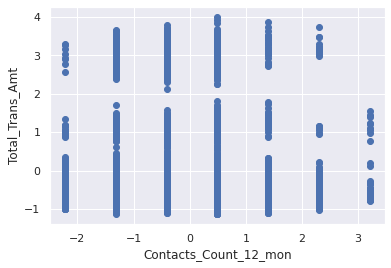

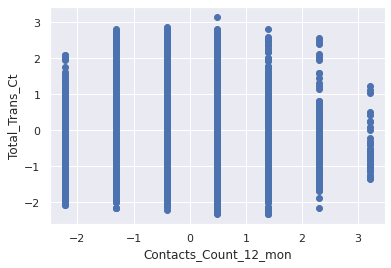

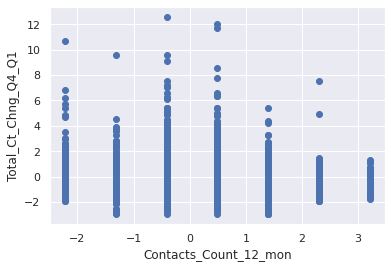

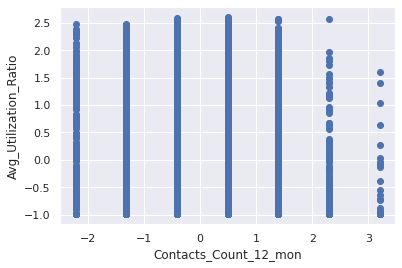

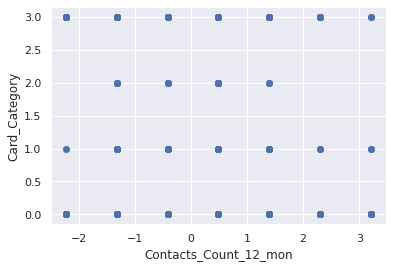

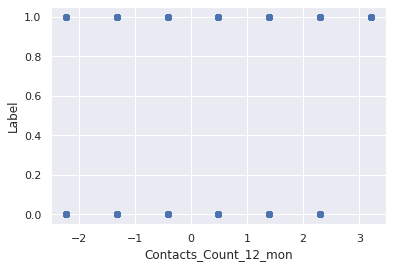

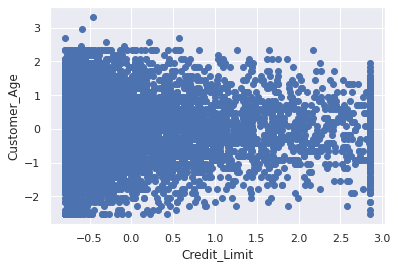

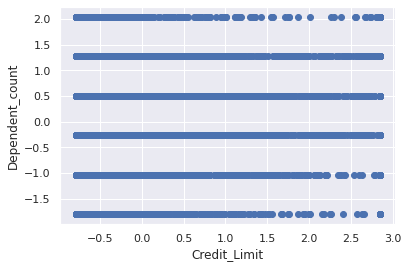

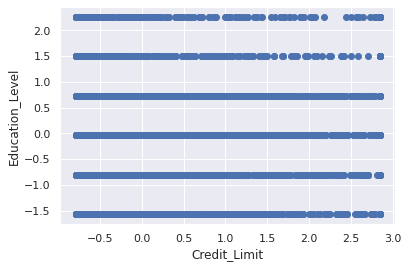

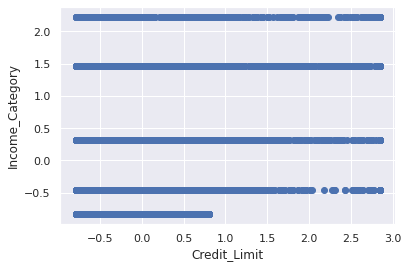

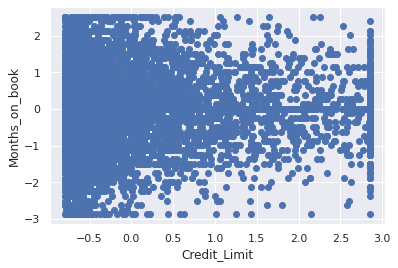

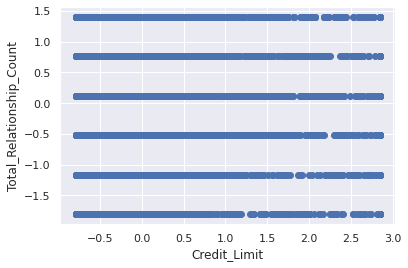

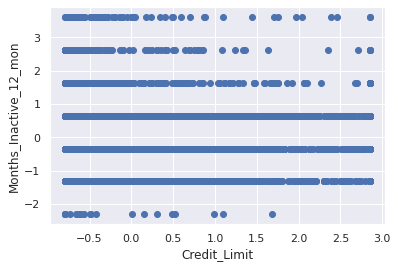

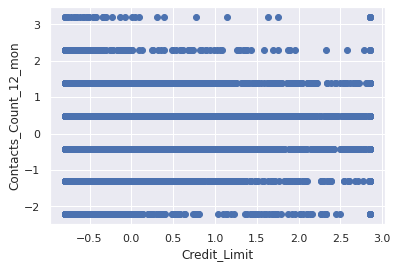

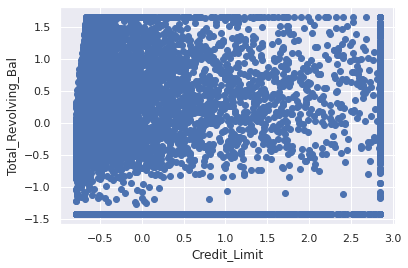

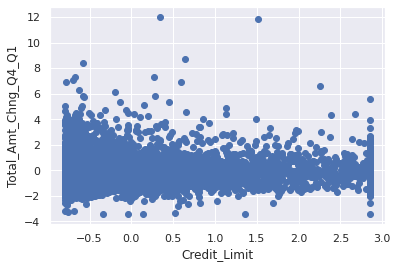

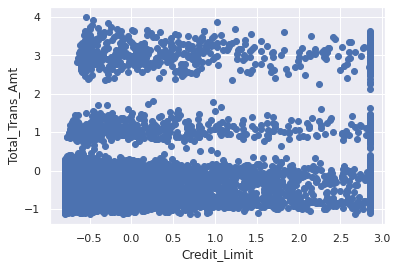

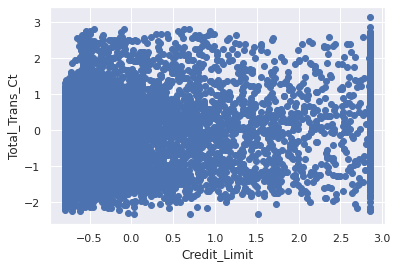

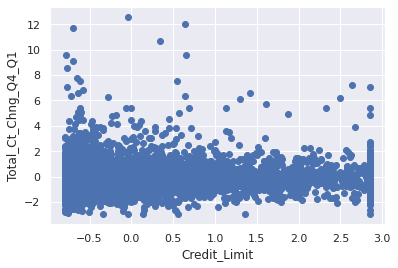

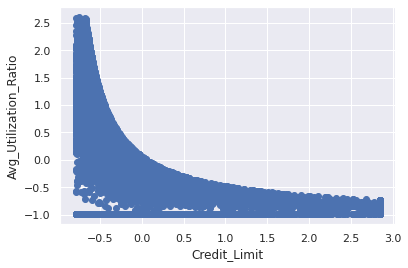

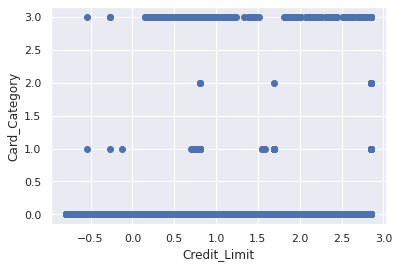

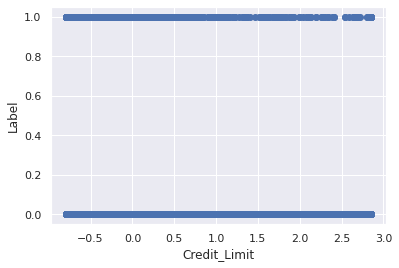

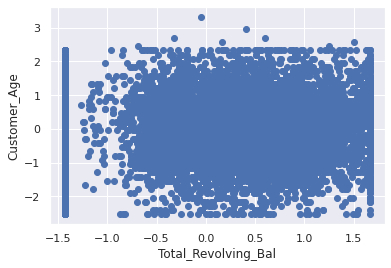

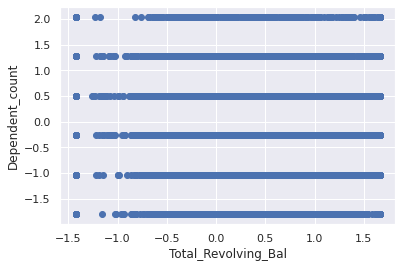

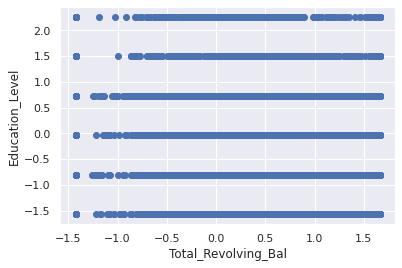

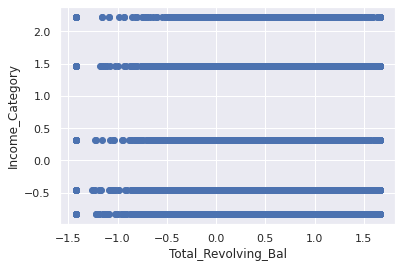

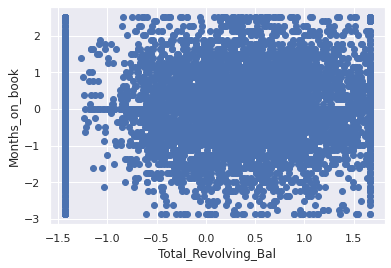

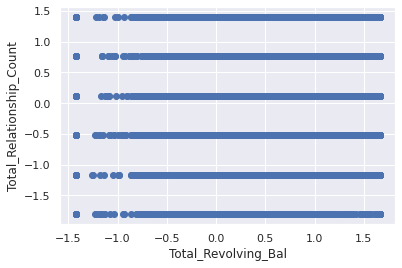

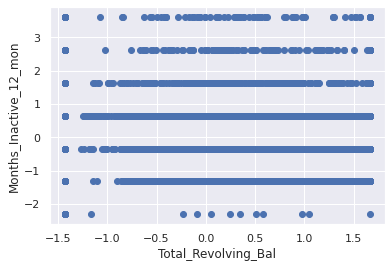

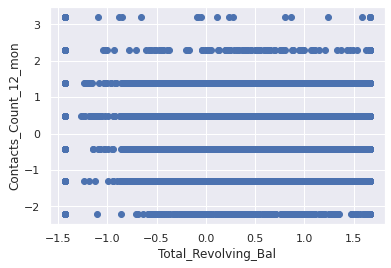

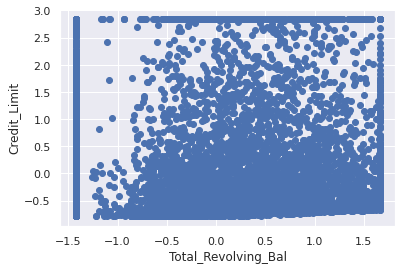

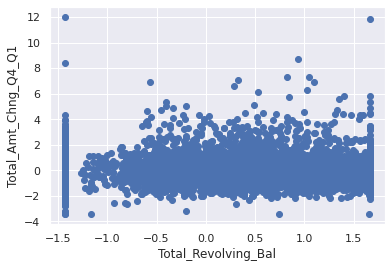

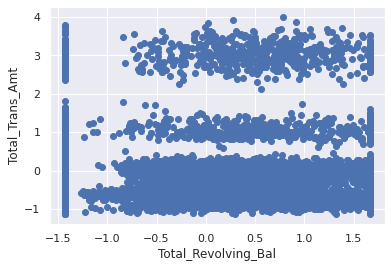

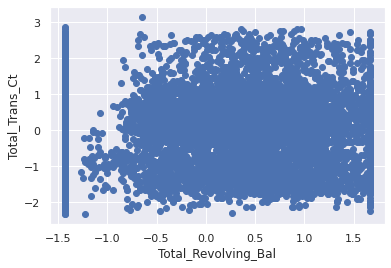

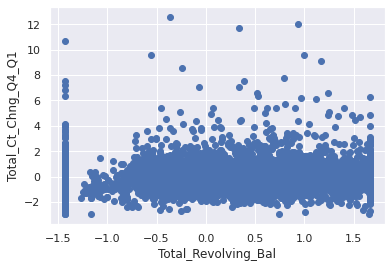

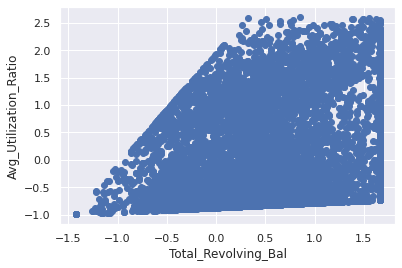

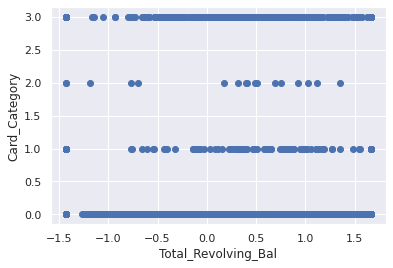

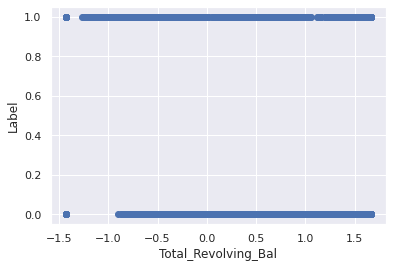

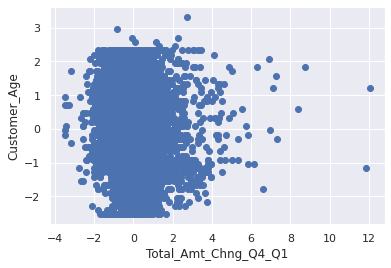

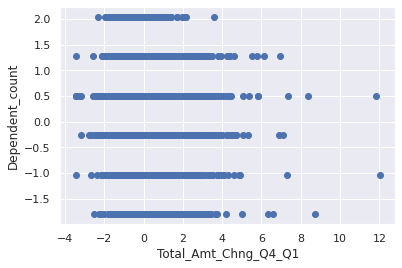

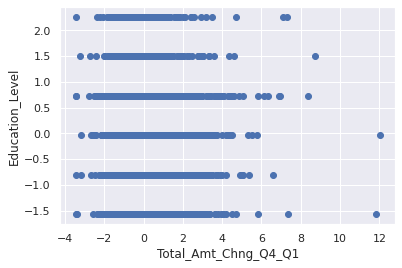

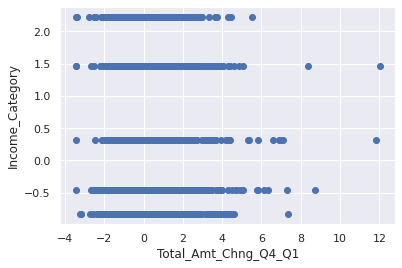

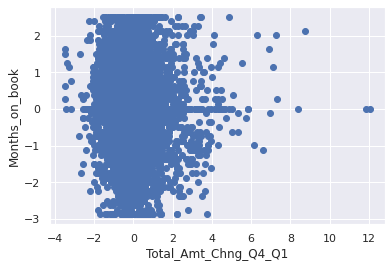

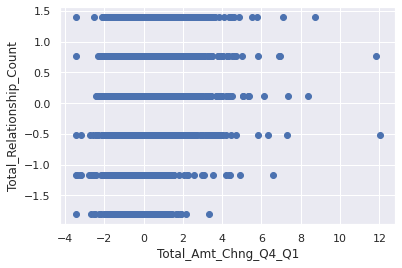

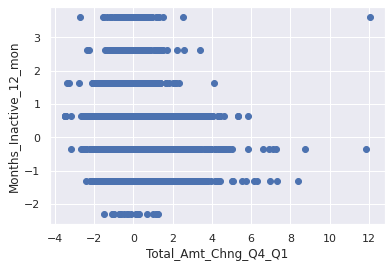

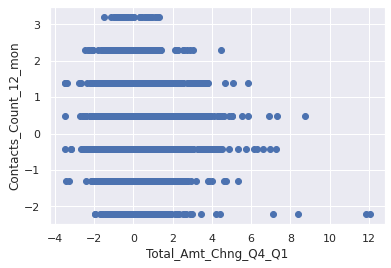

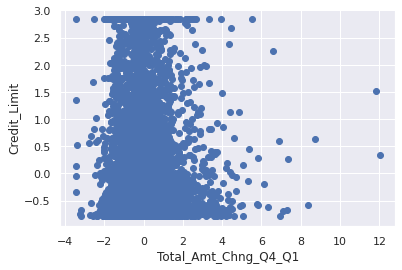

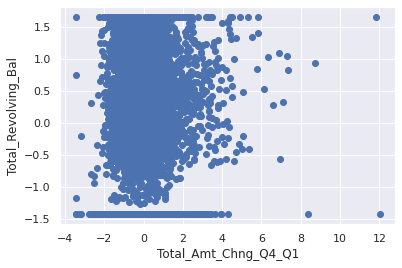

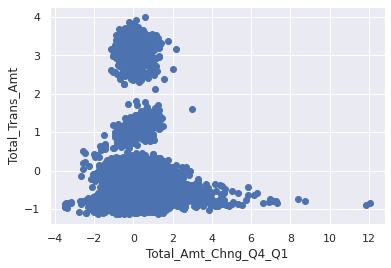

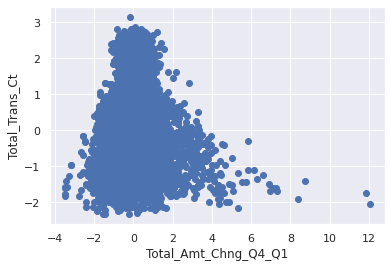

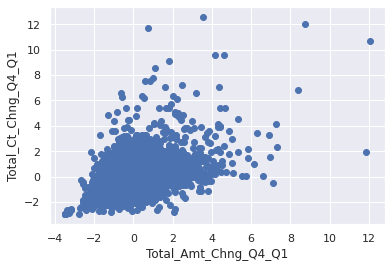

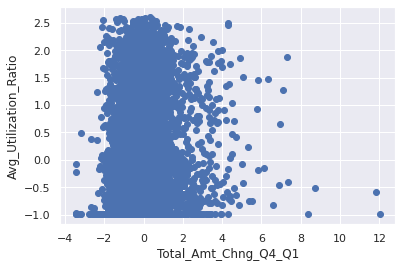

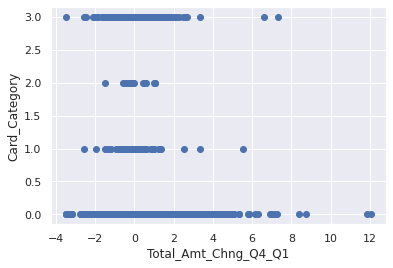

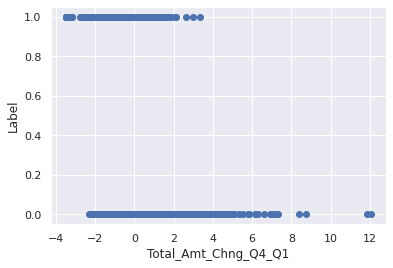

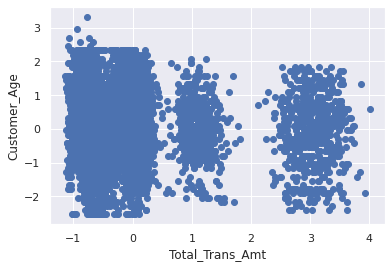

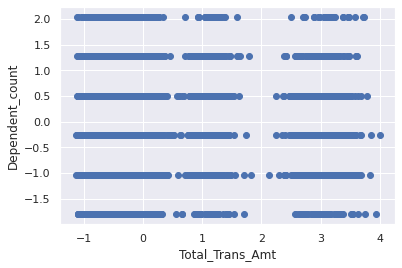

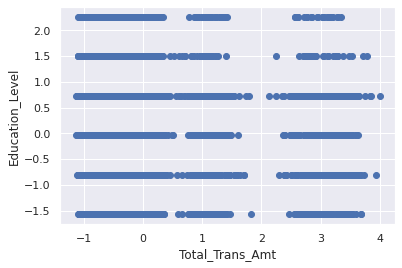

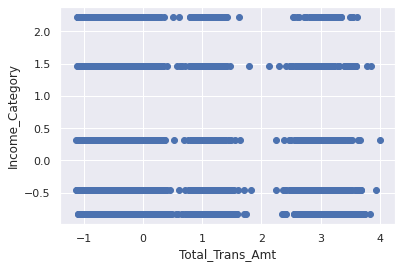

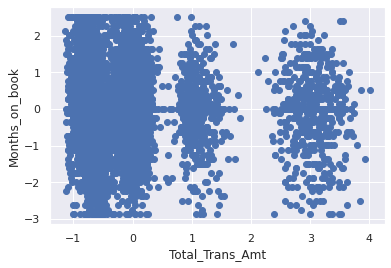

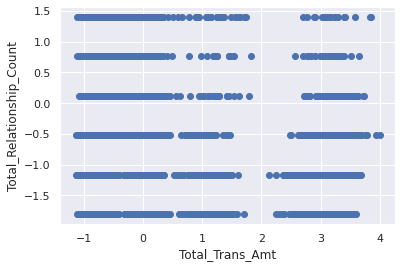

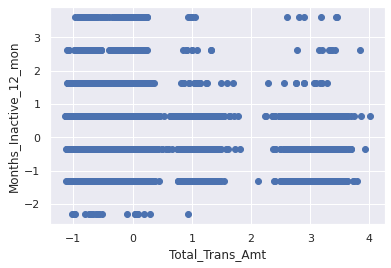

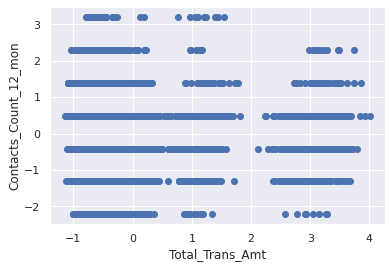

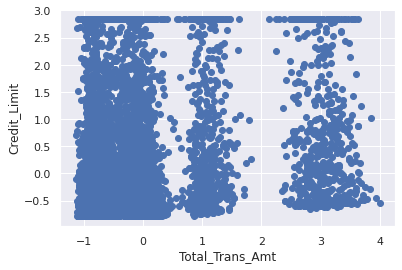

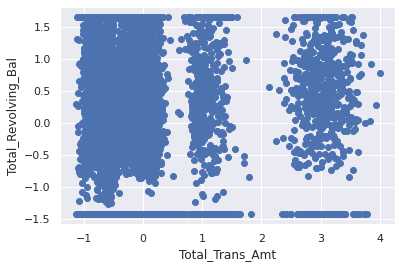

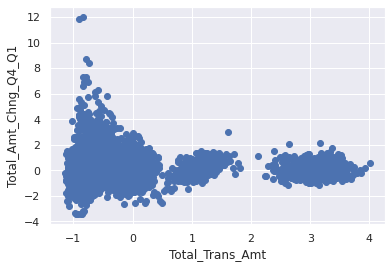

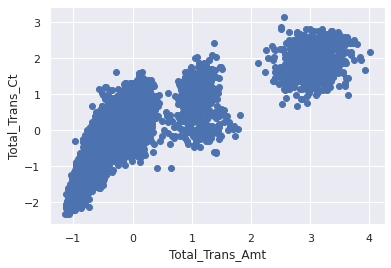

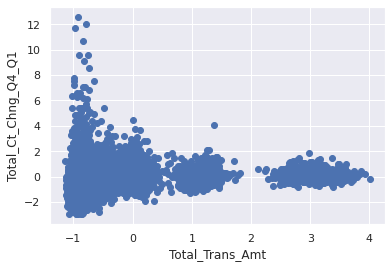

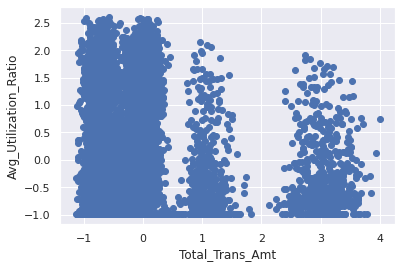

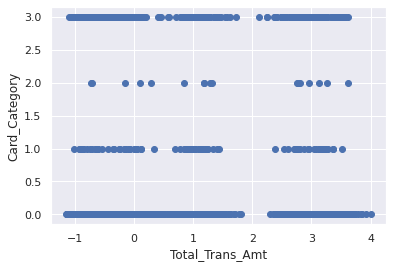

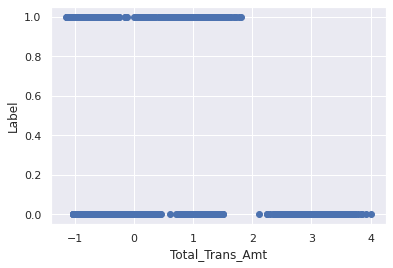

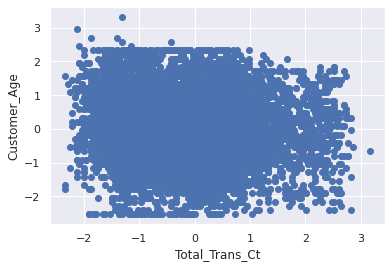

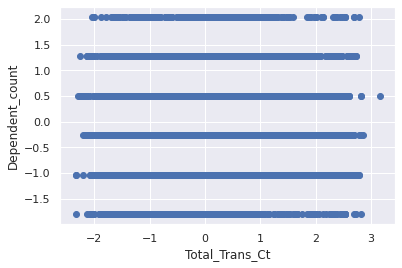

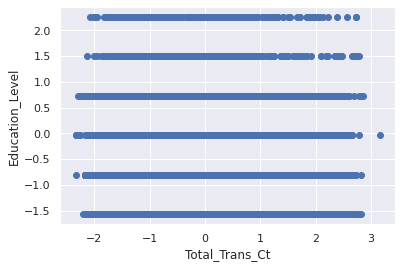

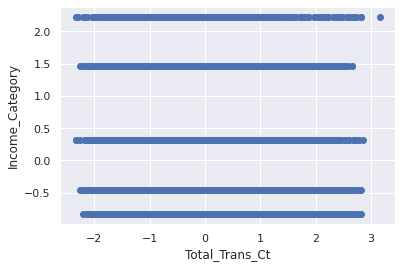

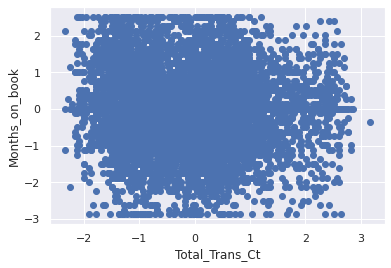

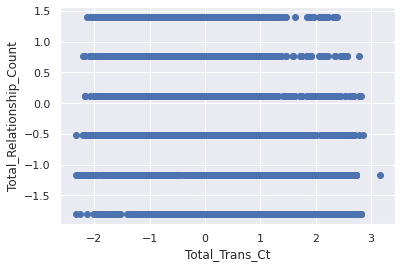

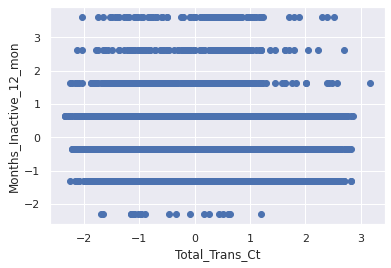

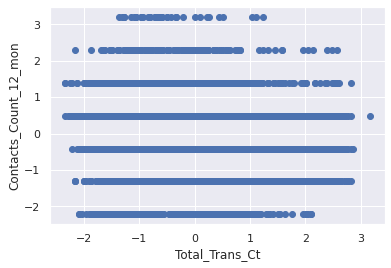

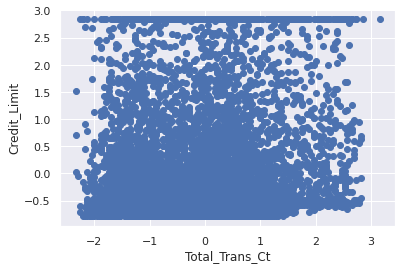

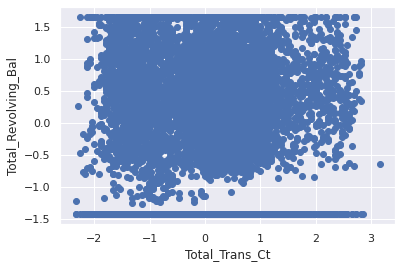

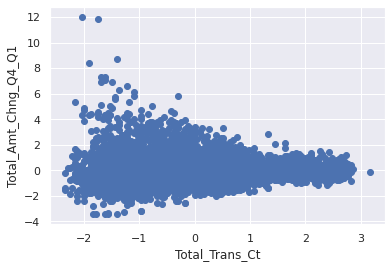

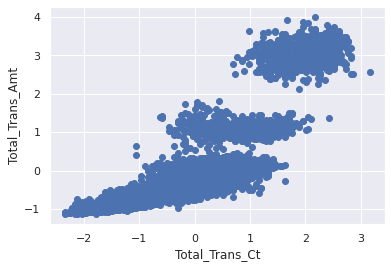

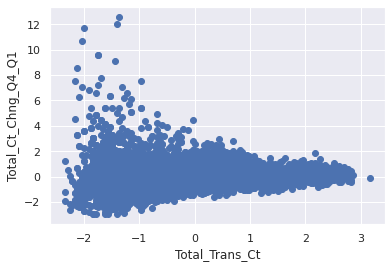

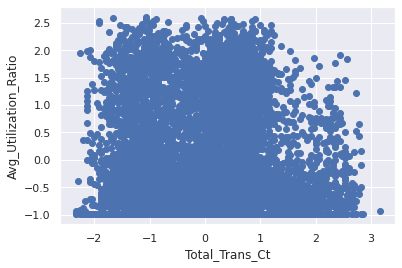

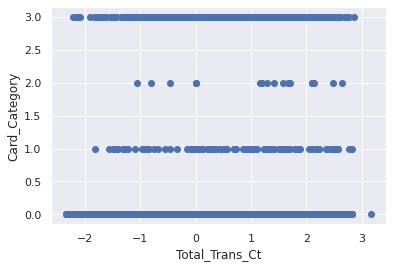

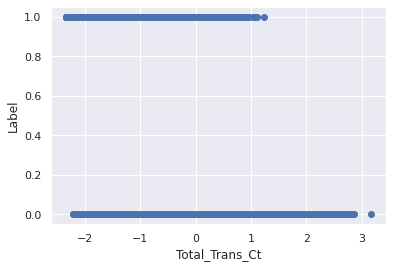

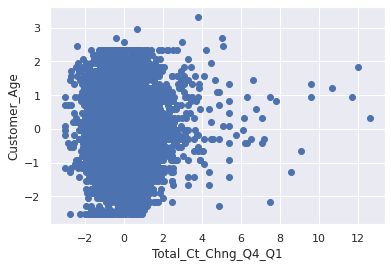

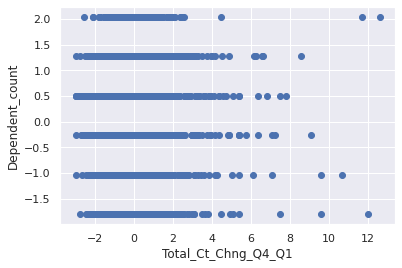

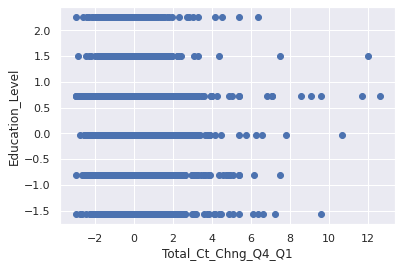

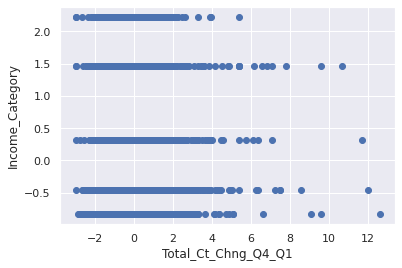

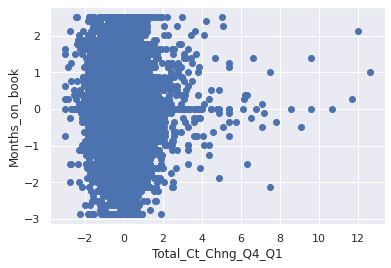

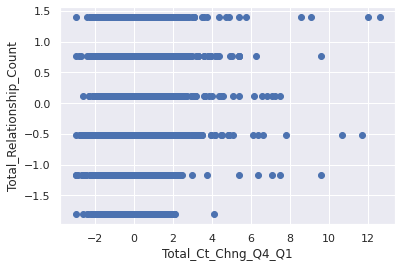

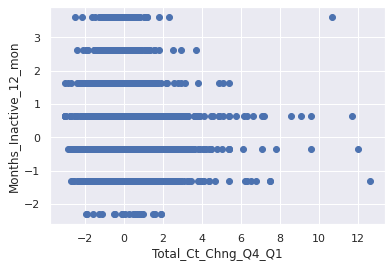

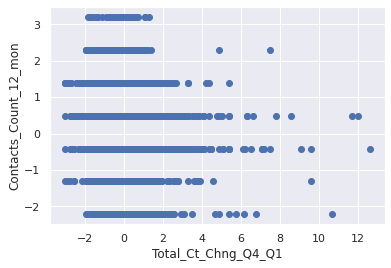

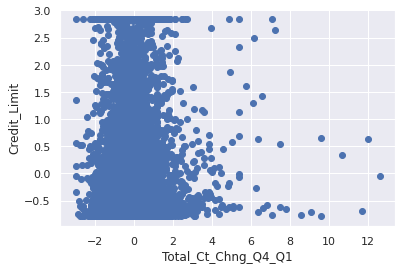

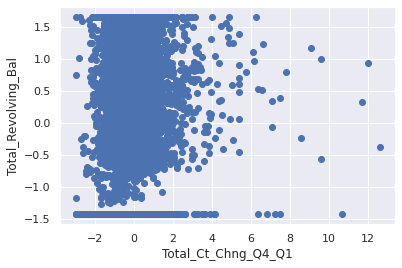

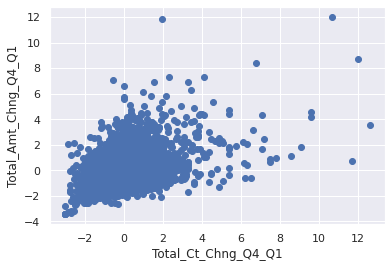

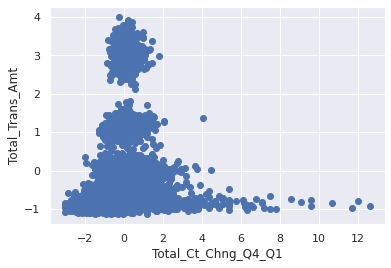

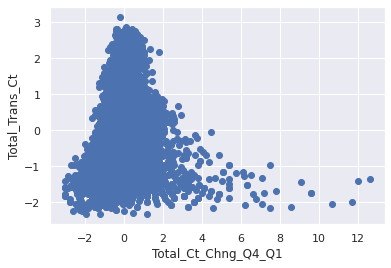

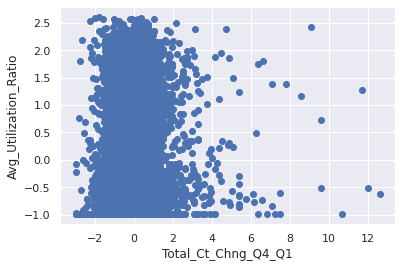

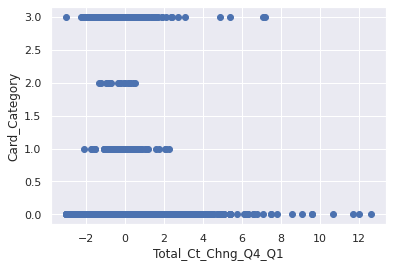

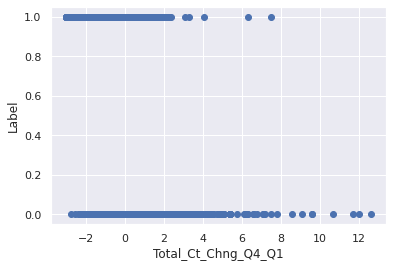

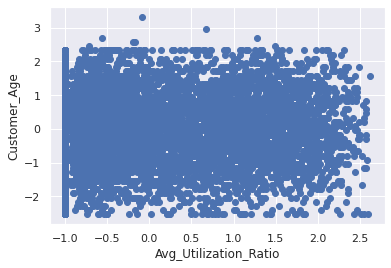

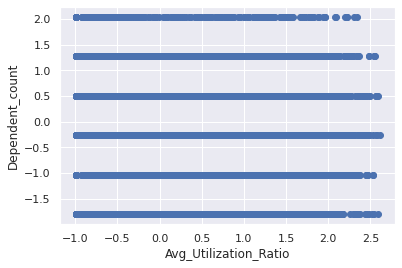

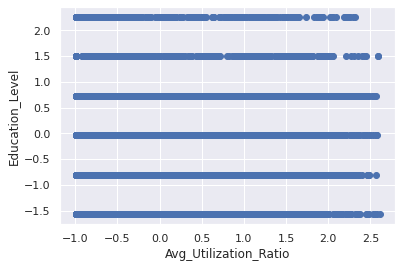

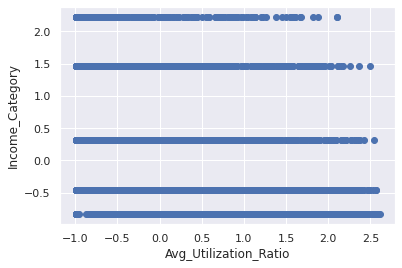

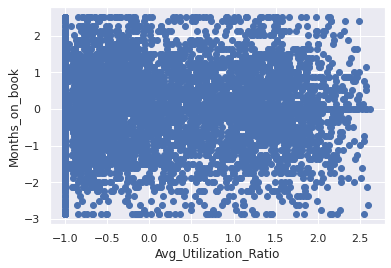

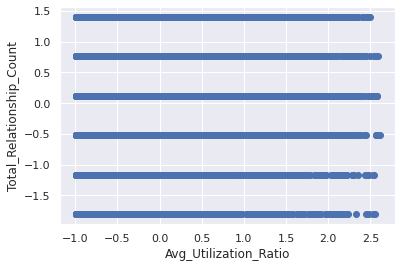

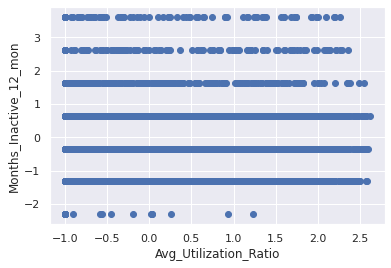

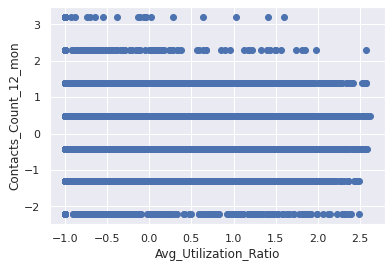

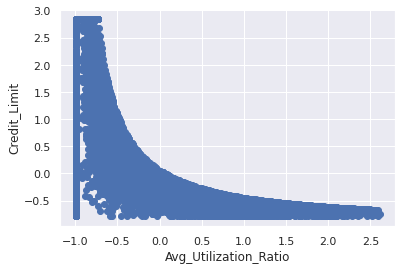

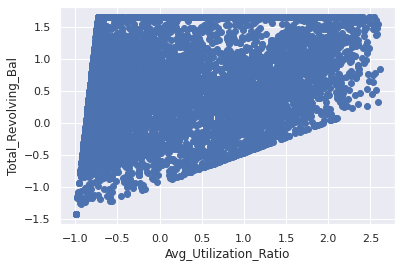

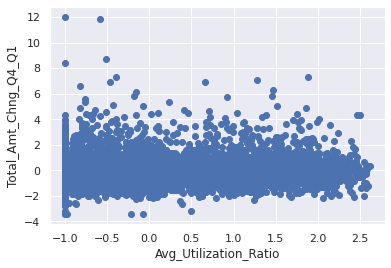

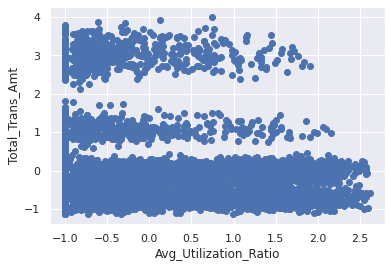

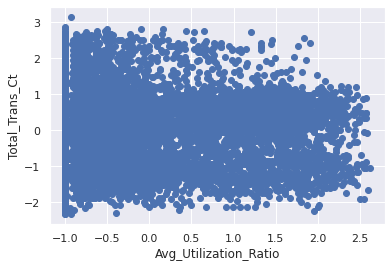

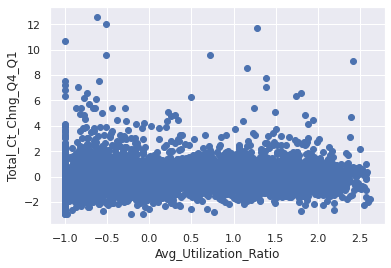

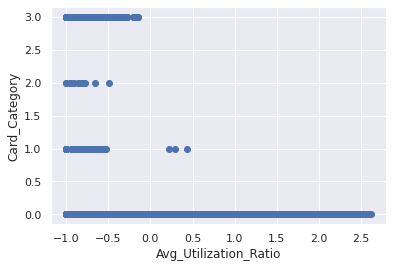

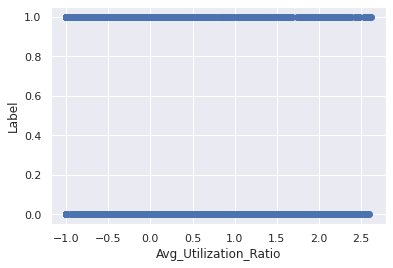

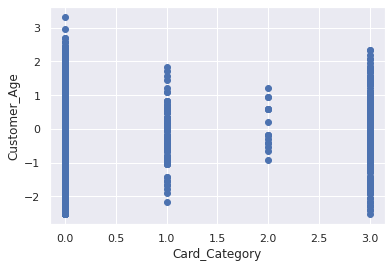

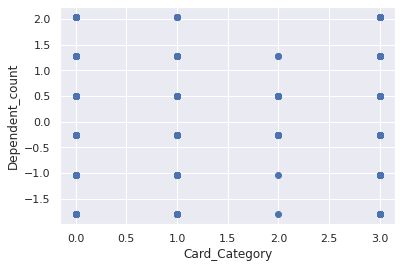

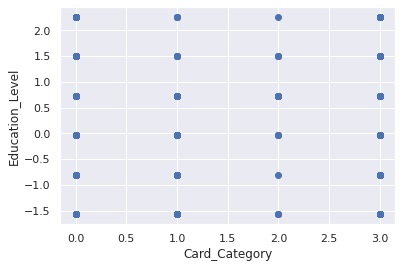

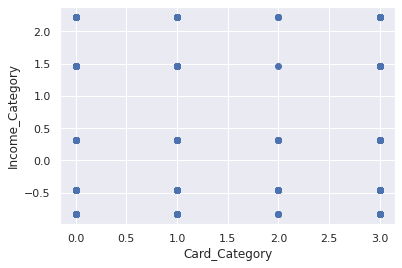

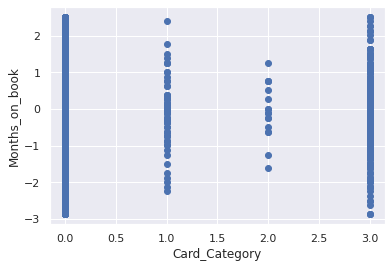

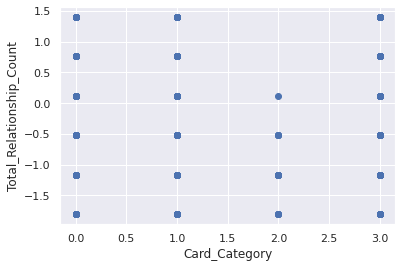

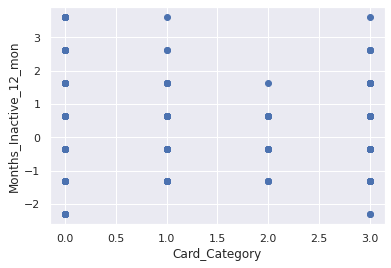

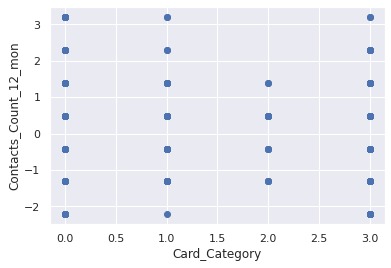

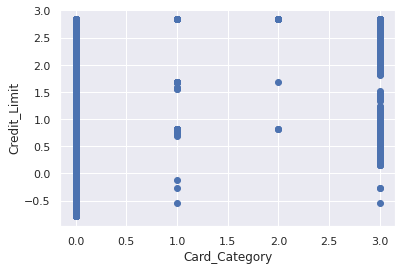

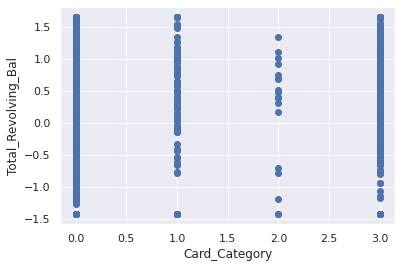

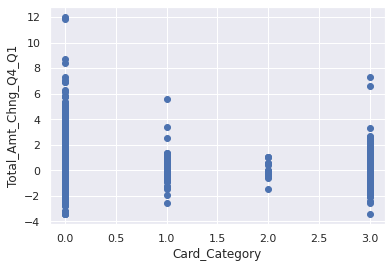

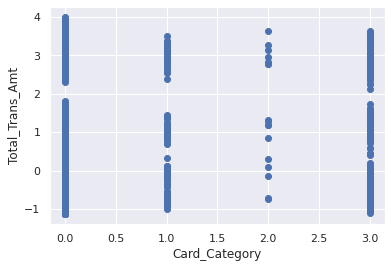

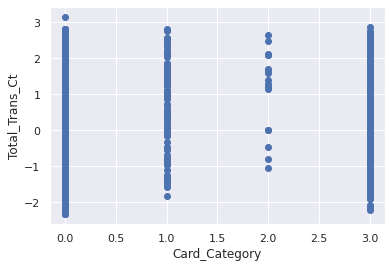

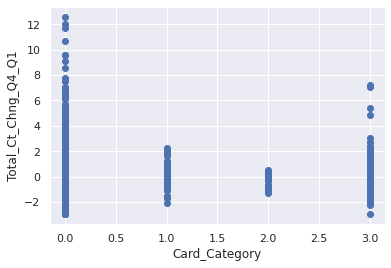

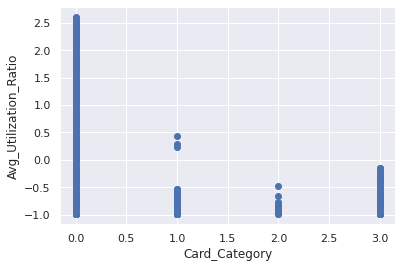

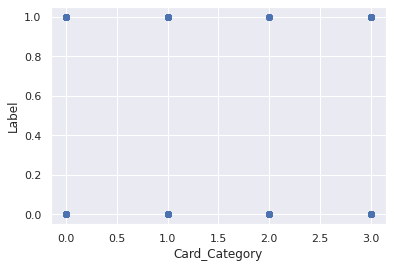

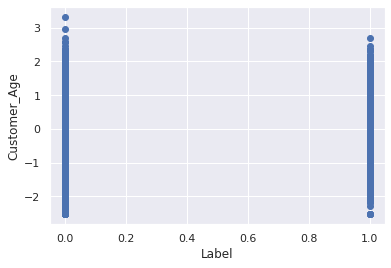

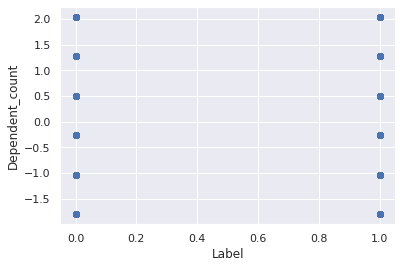

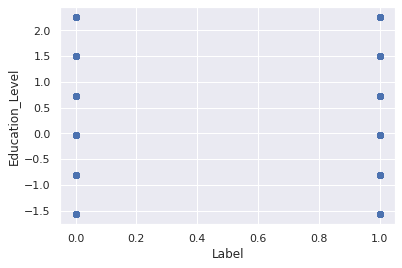

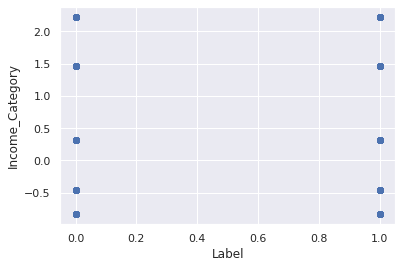

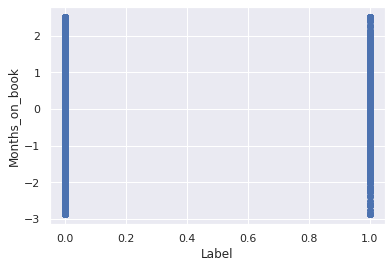

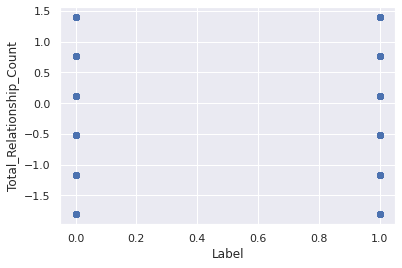

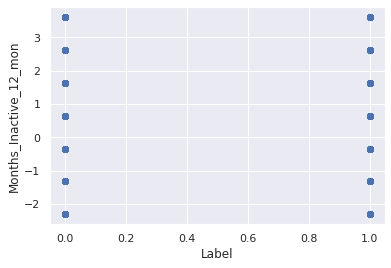

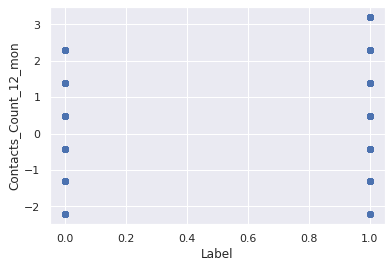

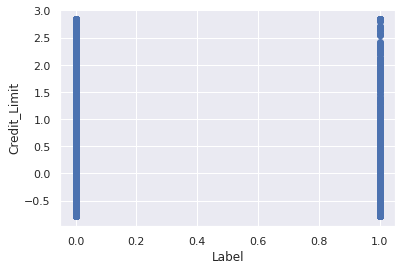

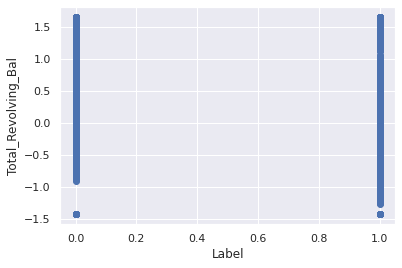

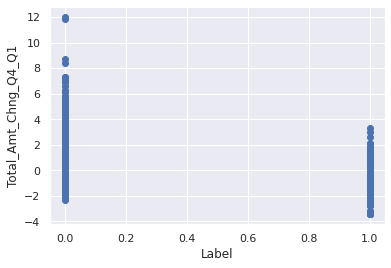

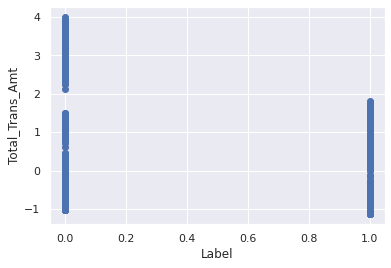

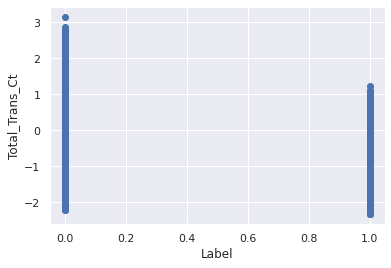

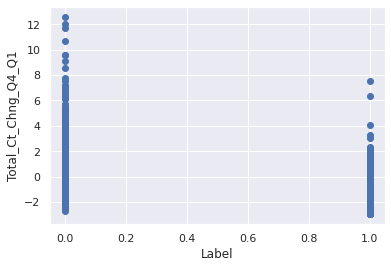

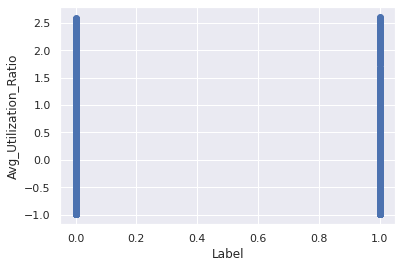

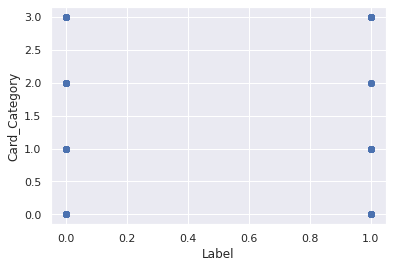

In [5]:
from pandas.plotting import scatter_matrix
for col_i in df.columns:
    for col_j in df.columns:
        if col_i != col_j:
            plt.scatter(df[col_i].values, df[col_j].values)
            plt.xlabel(col_i)
            plt.ylabel(col_j)
            plt.show()

One can observe various patterns, but no considerable correlations (as expected from the correlation matrix), except "Months on Book" vs. "Customer Age" (correlation of 79%).
Moreover, dotted lines indicate binned nature of variables.

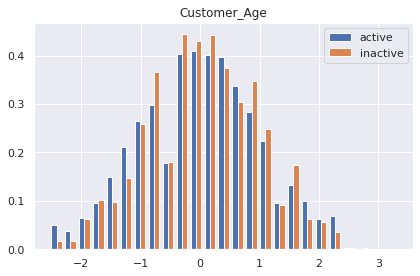

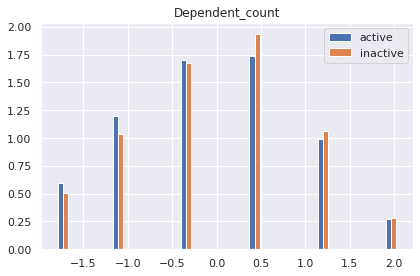

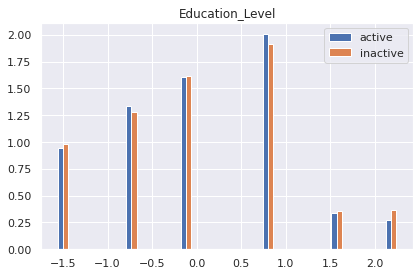

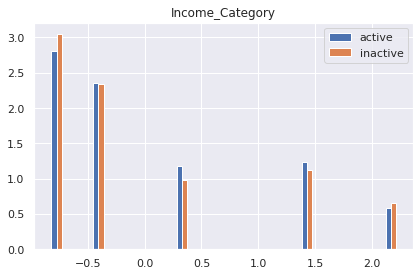

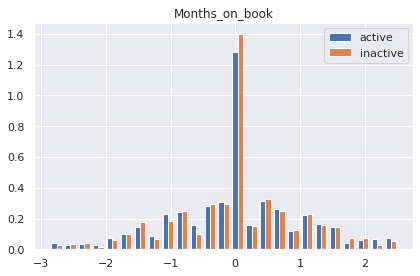

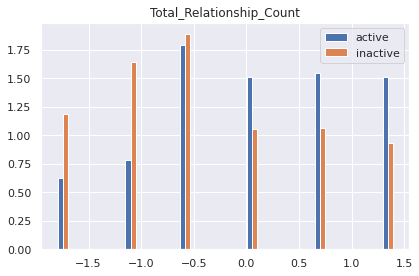

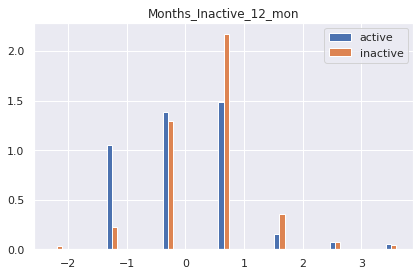

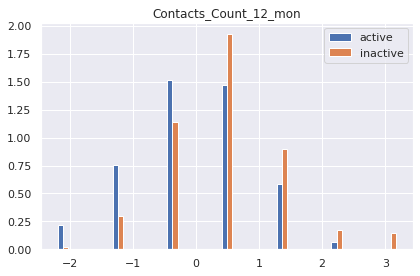

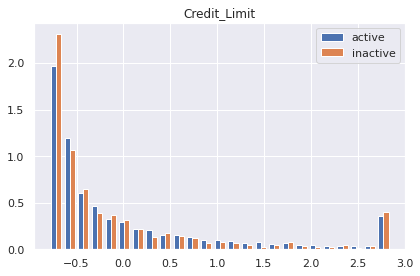

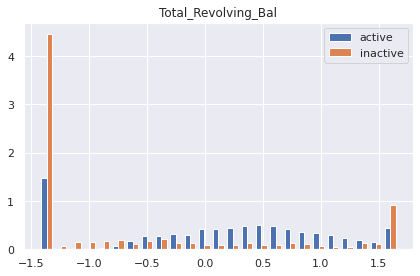

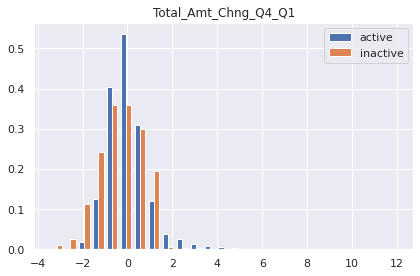

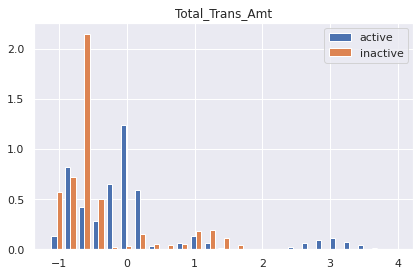

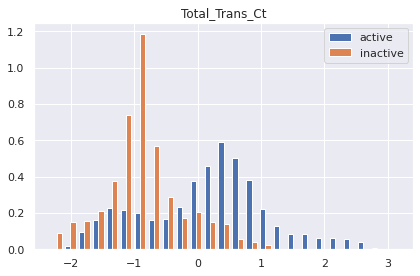

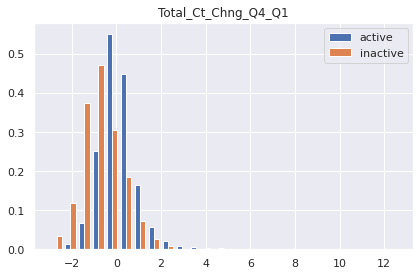

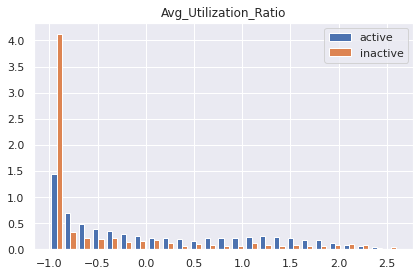

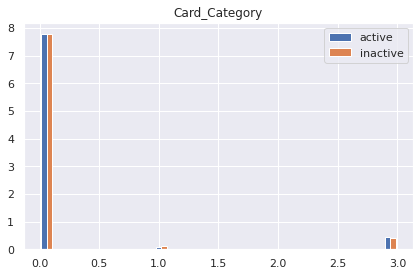

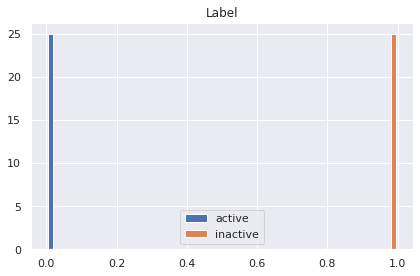

In [6]:
colours = ('blue', 'red')

# Split dataframe into two groups of customers (for plotting only)
# Use the original train df, not the feauture vector
df_active = df.loc[df['Label']==0]
df_inactive = df.loc[df['Label']==1]
for col in df.columns:
#     if df[col].dtypes == np.object:
#         continue
#     if col=='Education' or col=='Avg_Income':
#         continue # hack because df has no access to label :-()
#     #f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    #axes = (ax1, ax2)
    #for i, df_i in enumerate((df_active, df_inactive)):
    fig = plt.figure() 
    ax = fig.add_subplot(111)
    ax.hist([df_active[col], df_inactive[col]], label=("active", "inactive"), bins=25, density=True,rwidth=0.75)#, range=[0, 25])
    ax.set_title(col)
    ax.legend()
        #df_i.hist(column=col, bins=30, figsize=(8,3), color=colours[i], ax=axes[i])#, layout=(10,2))
        #save_fig("attribute_histogram_plots")
    plt.tight_layout()
    plt.show()

Features that distinguish the two categories of customers:
['Total_Relationship_Count', 'Months_inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal',
'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
'Avg_Utilization_Ratio']

Credit limit has a peak at the highest bin. This may be a max credit limit offerred by the bank.